In [214]:
import pandas as pd
import numpy as np
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Grid

In [2]:
grid = np.zeros((2,5,5))
grid

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

# Pieces

In [73]:
# Player 1
p1_4x1 = np.array([[[1,1,1,1]], [[0,0,0,0]]])
p1_3x1 = np.array([[[1,1,1]], [[0,0,0]]])
p1_2x1 = np.array([[[1,1]], [[0,0]]])
p1_L = np.array([[[1,0,0], [1,1,1]], [[0,0,0],[0,0,0]]])
p1_square = np.array([[[1,1],[1,1]], [[0,0],[0,0]]])
p1_corner = np.array([[[1, 0],[1, 1]], [[0, 0],[0, 0]]])
p1_pipe = np.array([[[0,1,0],[1,1,1]], [[0,0,0],[0,0,0]]])
p1_bend = np.array([[[0,1,1],[1,1,0]], [[0,0,0],[0,0,0]]])
p1_archer = np.array([[[1,0],[1,1]], [[0,0],[1,0]]])
p1_twistL = np.array([[[1,0],[1,1]], [[0,0],[0,1]]])
p1_twistR = np.array([[[0,1],[1,1]], [[0,0],[1,0]]])

p1_pieces = [
    p1_4x1,
    p1_3x1,
    p1_2x1,
    p1_L,
    p1_square,
    p1_corner,
    p1_pipe,
    p1_bend,
    p1_archer,
    p1_twistL,
    p1_twistR
]

# Player 2
p2_4x1 = np.array([[[2,2,2,2]], [[0,0,0,0]]])
p2_3x1 = np.array([[[2,2,2]], [[0,0,0]]])
p2_2x1 = np.array([[[2,2]], [[0,0]]])
p2_L = np.array([[[2,0,0], [2,2,2]], [[0,0,0],[0,0,0]]])
p2_square = np.array([[[2,2],[2,2]], [[0,0],[0,0]]])
p2_corner = np.array([[[2,0],[2,2]], [[0,0],[0,0]]])
p2_pipe = np.array([[[0,2,0],[2,2,2]], [[0,0,0],[0,0,0]]])
p2_bend = np.array([[[0,2,2],[2,2,0]], [[0,0,0],[0,0,0]]])
p2_archer = np.array([[[2,0],[2,2]], [[0,0],[2,0]]])
p2_twistL = np.array([[[2,0],[2,2]], [[0,0],[0,2]]])
p2_twistR = np.array([[[0,2],[2,2]], [[0,0],[2,0]]])

p2_pieces = [
    p2_4x1,
    p2_3x1,
    p2_2x1,
    p2_L,
    p2_square,
    p2_corner,
    p2_pipe,
    p2_bend,
    p2_archer,
    p2_twistL,
    p2_twistR
]

In [100]:
orient(p2_4x1)

array([[[2],
        [2],
        [2],
        [2]],

       [[0],
        [0],
        [0],
        [0]]])

# Play

In [16]:
# t = np.array([[[1, 0],[1, 1]], [[0, 0],[0, 0]]])
t = np.array([[[1,1,1]], [[0,0,0]]])
k1 = random.randint(0,3)
k2 = random.randint(0,3)

np.rot90(np.rot90(t, k=k1, axes=(0,1)), k=k2, axes=(1,2))

array([[[0, 1],
        [0, 1],
        [0, 1]]])

In [18]:
t = np.array([[1,1,1]])
k1 = random.randint(0,3)
np.rot90(t, k=k1, axes=(0,1))

array([[1, 1, 1]])

In [36]:
t = np.array([[[1, 0],[1, 1]], [[0, 0],[0, 0]]])
grid = fill_out(orient(t))
grid

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]])

In [383]:
def orient(piece):
    k1 = random.randint(0,3)
    k2 = random.randint(0,3)
    k3 = random.randint(0,3)
    return np.rot90(np.rot90(np.rot90(piece, k=k1, axes=(0,1)), k=k2, axes=(1,2)), k=k3, axes=(0,2))


def fill_out(piece, grid):
    n_layers, n_rows, n_columns = grid.shape
    stacks, rows, cols = piece.shape

    stack_max_start = n_layers-stacks
    row_max_start = n_rows-rows
    col_max_start = n_columns-cols

    stack_start = random.randint(0, stack_max_start)
    row_start = random.randint(0, row_max_start)
    col_start = random.randint(0, col_max_start)
    
    stack_top_pad = stack_start
    stack_bottom_pad = stack_max_start - stack_start
    row_top_pad = row_start
    row_bottom_pad = row_max_start - row_start
    col_left_pad = col_start
    col_right_pad = col_max_start - col_start

    return np.pad(piece,((stack_top_pad,stack_bottom_pad),(row_top_pad,row_bottom_pad),(col_left_pad,col_right_pad)))


def check_adjacent(grid, layer, player):
    n_layers, n_rows, n_columns = grid.shape
    
    adjacent = np.zeros((n_layers, n_rows, n_columns))

    for i, level in enumerate(grid):
        for j, row in enumerate(level):
            for k, val in enumerate(row):
                
                if val == player:

                    # Spots above current spots
                    if (i < (n_layers-1)) and (grid[i+1, j, k] == 0):
                        adjacent[i+1, j, k] = player

                    # Spots above/below current spots
                    if (j > 0) and (grid[i, j-1, k] == 0):
                        adjacent[i, j-1, k] = player
                    if (j < (n_rows-1)) and (grid[i, j+1, k] == 0):
                        adjacent[i, j+1, k] = player

                    # Spots left/right of current spots
                    if (k > 0) and (grid[i, j, k-1] == 0):
                        adjacent[i, j, k-1] = player
                    if (k < (n_columns-1)) and (grid[i, j, k+1] == 0):
                        adjacent[i, j, k+1] = player
                    
    adjacent_bool = False if (adjacent*layer).max() == 0 else True
    return adjacent, adjacent_bool


def check_nothanging(grid, layer, player):
    new_grid = grid + layer
    
    for i, level in enumerate(new_grid):
            for j, row in enumerate(level):
                for k, val in enumerate(row):
                    if val == player:
                        # Spots below cant be empty
                        if (i > 0) and (new_grid[i-1, j, k] == 0):
                            return False
    return True
    
    
def play_move(piece_list, grid, player, start, piece_names):
    
    attempt_counter = 0
    
    while True:
    
        # Randomly choose a piece
        piece_i = random.randint(0, len(piece_list)-1)
        piece = piece_list[piece_i]

        # Randomly rotate piece and place it's location
        oriented_piece = orient(piece)
        layer = fill_out(oriented_piece, grid)

        
        # Check if it is a legal move
        
        # Are any spots already taken?
        if (grid*layer).max() == 0:
            spot_bool = True
        else:
            spot_bool = False

        # Check if adjacent to an existing piece (unless it's the first turn)
        if (spot_bool is True) and (start is False):
            adjacent, adjacent_bool = check_adjacent(grid, layer, player)
        else:
            adjacent_bool = True
            adjacent = ''
        
        # Check that the piece is not hanging
        if (spot_bool is True) and (adjacent_bool is True):
            nothanging_bool = check_nothanging(grid, layer, player)
        else:
            nothanging_bool = False
        
        # Make that play if it is legal
        if (spot_bool is True) and (adjacent_bool is True) and (nothanging_bool is True):
            grid += layer
            del piece_list[piece_i]
            piece_name = piece_names.pop(piece_i)
            print(piece_name,)
            print(f'# of attempts: {attempt_counter}')
            print('Grid:\n', grid, '\n')
            
            pieces_dict[player] = piece_list
            piece_name_dict[player] = piece_names
            
            return grid
        
        # Keep track of attempts
        attempt_counter+=1
        if attempt_counter==5000:
            print(f'Player {player} maxed out attempts\n')
            still_playing_dict[player] = False
            return grid
        
        
def draw_board(grid):
    grid_t = grid.transpose((2,1,0))
    
    color = []
    for i, layer in enumerate(grid_t):
        for j, row in enumerate(layer):
            for k, val in enumerate(row):
                if val == 0:
                    color.append('none')
                elif val == 1:
                    color.append('yellow')
                elif val == 2:
                    color.append('red')
    df = pd.DataFrame({'color':color})

    ax = plt.figure().add_subplot(projection='3d')
    fig = ax.voxels(grid_t, facecolors=np.array(df.color).reshape((5,4,4)), edgecolor='k')
    return fig

Turn 0, Player 1
p1_square
# of attempts: 1
Grid:
 [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]] 

Turn 1, Player 2
p2_2x1
# of attempts: 7
Grid:
 [[[0. 0. 0. 2. 0.]
  [0. 0. 0. 2. 0.]
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]] 

Turn 2, Player 1
p1_3x1
# of attempts: 39
Grid:
 [[[0. 0. 0. 2. 0.]
  [0. 1. 0. 2. 0.]
  [1. 1. 0. 0. 0.]
  [1. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0.

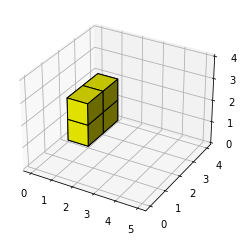

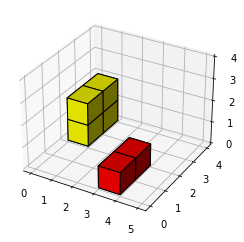

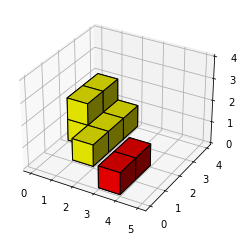

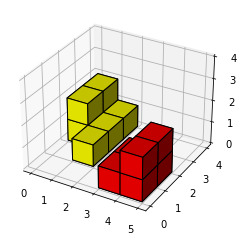

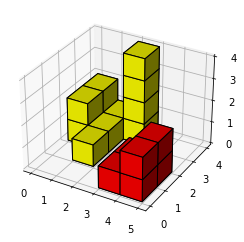

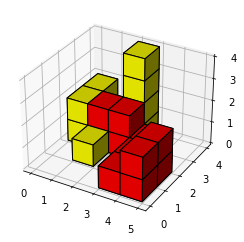

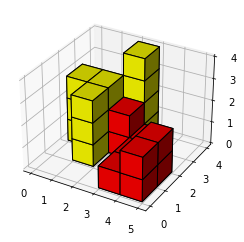

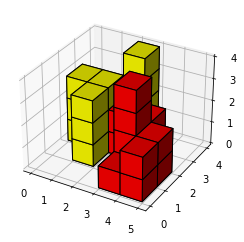

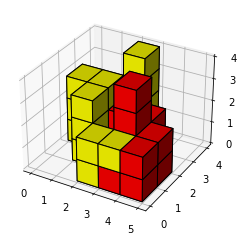

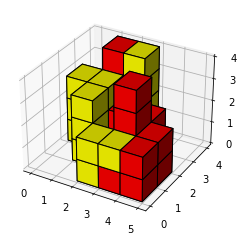

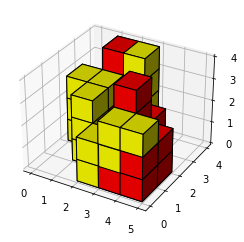

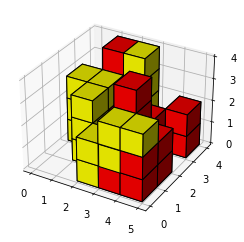

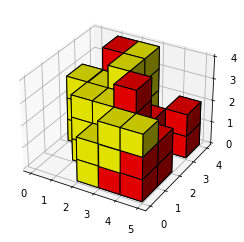

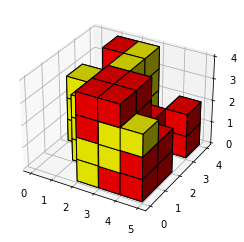

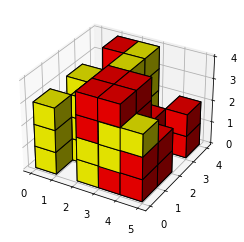

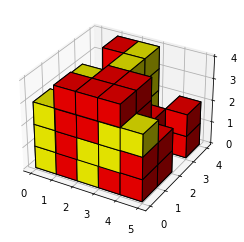

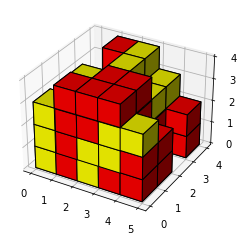

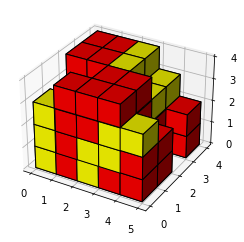

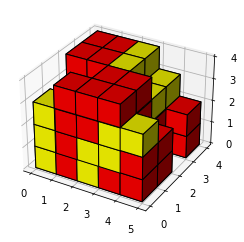

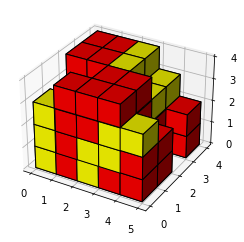

In [398]:
i=0
grid = np.zeros((4, 4, 5))

pieces_dict = {
    1: [p1_4x1, p1_3x1, p1_2x1, p1_L, p1_square, p1_corner, p1_pipe, p1_bend, p1_archer, p1_twistL, p1_twistR],
    2: [p2_4x1, p2_3x1, p2_2x1, p2_L, p2_square, p2_corner, p2_pipe, p2_bend, p2_archer, p2_twistL, p2_twistR]
}

piece_name_dict = {
    1: [
        'p1_4x1','p1_3x1','p1_2x1','p1_L','p1_square','p1_corner',
        'p1_pipe','p1_bend','p1_archer','p1_twistL','p1_twistR'
    ],
    2: [
        'p2_4x1','p2_3x1','p2_2x1','p2_L','p2_square','p2_corner',
        'p2_pipe','p2_bend','p2_archer','p2_twistL','p2_twistR'
    ]
}

still_playing_dict = {
    1: True,
    2: True
}


while i<=20:
    # Figure out whose turn it is and get their available pieces
    player = 1 if i%2 == 0 else 2
    print(f'Turn {i}, Player {player}')
    
    piece_list = pieces_dict[player]
    piece_names = piece_name_dict[player]
    still_playing = still_playing_dict[player]
    
    # Indicate if it's the player's first turn
    start = True if i<=1 else False
    
    # Play a piece
    if (still_playing is True) and (len(piece_list) > 0):
        grid = play_move(piece_list, grid, player, start, piece_names)
        fig = draw_board(grid)
        plt.show
    
    i+=1

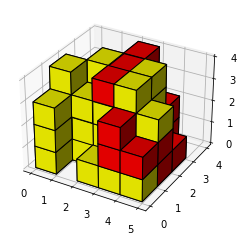

In [321]:
fig = draw_board(np.rot90(grid, k=2, axes=(1,2)))

In [322]:
grid

array([[[0., 2., 2., 2., 2.],
        [2., 2., 1., 1., 0.],
        [2., 2., 1., 1., 1.],
        [1., 1., 1., 0., 1.]],

       [[0., 2., 2., 2., 2.],
        [0., 2., 2., 1., 0.],
        [2., 2., 1., 1., 1.],
        [2., 2., 0., 0., 1.]],

       [[0., 0., 2., 1., 1.],
        [0., 1., 2., 1., 0.],
        [1., 1., 1., 1., 1.],
        [0., 2., 0., 0., 1.]],

       [[0., 0., 2., 0., 0.],
        [0., 1., 2., 1., 0.],
        [0., 1., 2., 0., 1.],
        [0., 0., 0., 0., 0.]]])

In [356]:
p = fill_out(orient(p1_4x1), grid)
p

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]]])

In [396]:
o = orient(p1_4x1)
print(o.shape)
o

(1, 4, 2)


array([[[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]]])

In [357]:
n_layers, n_rows, n_columns = grid.shape
stacks, rows, cols = o.shape

In [363]:
o

array([[[1],
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        [0]]])

In [361]:
o.shape

(2, 4, 1)

In [ ]:
n_layers, n_rows, n_columns = grid.shape
stacks, rows, cols = o.shape

stack_max_start = n_layers-stacks
row_max_start = n_rows-rows
col_max_start = n_columns-cols

stack_start = random.randint(0, stack_max_start)
row_start = random.randint(0, row_max_start)
col_start = random.randint(0, col_max_start)

stack_top_pad = stack_start
stack_bottom_pad = stack_max_start - stack_start
row_top_pad = row_start
row_bottom_pad = row_max_start - row_start
col_left_pad = col_start
col_right_pad = col_max_start - col_start

return np.pad(piece,((stack_top_pad,stack_bottom_pad),(row_top_pad,row_bottom_pad),(col_left_pad,col_right_pad)))

In [304]:
grid

array([[[0., 2., 2., 2., 2.],
        [2., 2., 1., 1., 0.],
        [2., 2., 1., 1., 1.],
        [1., 1., 1., 0., 1.]],

       [[0., 2., 2., 2., 2.],
        [0., 2., 2., 1., 0.],
        [2., 2., 1., 1., 1.],
        [2., 2., 0., 0., 1.]],

       [[0., 0., 2., 1., 1.],
        [0., 1., 2., 1., 0.],
        [1., 1., 1., 1., 1.],
        [0., 2., 0., 0., 1.]],

       [[0., 0., 2., 0., 0.],
        [0., 1., 2., 1., 0.],
        [0., 1., 2., 0., 1.],
        [0., 0., 0., 0., 0.]]])

In [225]:
x = []
y = []
z = []
color = []
player = []

for i, layer in enumerate(grid):
    for j, row in enumerate(layer):
        for k, val in enumerate(row):
            z.append(i)
            x.append(j)
            y.append(k)
            player.append(val)
            if val == 0:
                color.append('none')
            elif val == 1:
                color.append('yellow')
            elif val == 2:
                color.append('red')
                
df = pd.DataFrame({'x':x, 'y':y, 'z':z, 'color':color, 'player':player})

In [264]:
fig = px.scatter_3d(
    x=df.x, y=df.y, z=df.z,
    color=df.color,
    color_discrete_map={'none':'rgba(0,0,0,0)', 'red':'red', 'yellow':'yellow'}
).update_layout(
    showlegend=False,
    scene_xaxis_visible=False,
    scene_yaxis_visible=False,
    scene_zaxis_visible=False
).update_traces(
    marker_symbol='circle',
    marker_size=40,
    marker_opacity=.95
)

fig.show() 

In [ ]:
np.array(
    [[[x0-y0-z0, x0-y0-z1, x0-y0-z2, x0-y0-z3],
      [x0-y1-z0, x0-y1-z1, x0-y1-z2, x0-y1-z3],
      [x0-y2-z0, x0-y2-z1, x0-y2-z2, x0-y2-z3],
      [x0-y3-z0, x0-y3-z1, x0-y3-z2, x0-y3-z3]],
    
     [[x1-y0-z0, x1-y0-z1, x1-y0-z2, x1-y0-z3],
      [x1-y1-z0, x1-y1-z1, x1-y1-z2, x1-y1-z3],
      [x1-y2-z0, x1-y2-z1, x1-y2-z2, x1-y2-z3],
      [x1-y3-z0, x1-y3-z1, x1-y3-z2, x1-y3-z3]],
     
     [[x2-y0-z0, x2-y0-z1, x2-y0-z2, x2-y0-z3],
      [x2-y1-z0, x2-y1-z1, x2-y1-z2, x2-y1-z3],
      [x2-y2-z0, x2-y2-z1, x2-y2-z2, x2-y2-z3],
      [x2-y3-z0, x2-y3-z1, x2-y3-z2, x2-y3-z3]],
     
     [[x3-y0-z0, x3-y0-z1, x3-y0-z2, x3-y0-z3],
      [x3-y1-z0, x3-y1-z1, x3-y1-z2, x3-y1-z3],
      [x3-y2-z0, x3-y2-z1, x3-y2-z2, x3-y2-z3],
      [x3-y3-z0, x3-y3-z1, x3-y3-z2, x3-y3-z3]],
     
     [[x4-y0-z0, x4-y0-z1, x4-y0-z2, x4-y0-z3],
      [x4-y1-z0, x4-y1-z1, x4-y1-z2, x4-y1-z3],
      [x4-y2-z0, x4-y2-z1, x4-y2-z2, x4-y2-z3],
      [x4-y3-z0, x4-y3-z1, x4-y3-z2, x4-y3-z3]]]
)

In [265]:
grid

array([[[0., 0., 2., 1., 0.],
        [2., 2., 2., 1., 1.],
        [0., 1., 2., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[0., 0., 0., 2., 0.],
        [2., 2., 2., 2., 0.],
        [0., 2., 2., 1., 2.],
        [1., 2., 2., 2., 2.]],

       [[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0.],
        [0., 2., 2., 1., 0.],
        [2., 2., 1., 0., 2.]],

       [[0., 0., 0., 0., 0.],
        [1., 2., 2., 1., 0.],
        [0., 2., 1., 1., 0.],
        [0., 1., 1., 0., 0.]]])

In [283]:
grid2

array([[[0., 2., 0., 1.],
        [0., 2., 0., 1.],
        [0., 1., 0., 2.],
        [0., 1., 0., 0.]],

       [[0., 2., 1., 1.],
        [0., 2., 2., 2.],
        [0., 1., 2., 2.],
        [0., 2., 2., 1.]],

       [[2., 2., 2., 1.],
        [0., 2., 2., 2.],
        [0., 1., 2., 1.],
        [0., 2., 1., 1.]],

       [[1., 1., 1., 1.],
        [2., 2., 1., 2.],
        [0., 1., 1., 0.],
        [0., 1., 1., 0.]],

       [[0., 1., 1., 1.],
        [0., 0., 2., 2.],
        [0., 0., 0., 2.],
        [0., 0., 0., 0.]]])

In [284]:
grid.transpose((2,1,0))

array([[[0., 0., 0., 0.],
        [2., 2., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 2., 0.]],

       [[0., 0., 0., 0.],
        [2., 2., 1., 2.],
        [1., 2., 2., 2.],
        [1., 2., 2., 1.]],

       [[2., 0., 0., 0.],
        [2., 2., 1., 2.],
        [2., 2., 2., 1.],
        [1., 2., 1., 1.]],

       [[1., 2., 0., 0.],
        [1., 2., 1., 1.],
        [1., 1., 1., 1.],
        [1., 2., 0., 0.]],

       [[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 2., 0., 0.],
        [1., 2., 2., 0.]]])

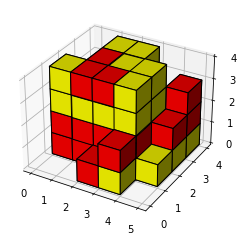

In [292]:
grid_t = grid.transpose((2,1,0))

color = []
for i, layer in enumerate(grid_t):
    for j, row in enumerate(layer):
        for k, val in enumerate(row):
            if val == 0:
                color.append('none')
            elif val == 1:
                color.append('yellow')
            elif val == 2:
                color.append('red')
df = pd.DataFrame({'color':color})

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(grid_t, facecolors=np.array(df.color).reshape((5,4,4)), edgecolor='k')
plt.show()

In [257]:
fig = go.Figure(data=go.Volume(
    x=df.x,
    y=df.y,
    z=df.z,
    value=df.player,
    isomin=0,
    isomax=1,
    opacity=.1, # needs to be small to see through all surfaces
    surface_count=80, # needs to be a large number for good volume rendering
    ))
fig.show()